# EPSILON DATA SCIENCE HIRING CHALLENGE - DEBADRI

## Importing dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.signal import lfilter

In [2]:
import chardet
import pandas as pd

with open('stockdata.csv', 'rb') as f:
    result = chardet.detect(f.read())  # or readline if the file is large


df=pd.read_csv('stockdata.csv', encoding=result['encoding'])
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


## Data Pre-processing

In [3]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [4]:
df.shape

(541909, 8)

In [5]:
df['StockCode'].nunique()

4070

In [6]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [7]:
df['CustomerID'].fillna(-1,inplace=True)

In [8]:
df.shape

(541909, 8)

In [9]:
df['Description'].fillna('Not Available',inplace=True)

In [10]:
df.shape

(541909, 8)

In [11]:
df['InvoiceDate'] =  pd.to_datetime(df['InvoiceDate'], infer_datetime_format=True)

In [12]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [13]:
df.index=df['InvoiceDate']

In [14]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
InvoiceDate,,,,,,,,
2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2010-12-01 08:26:00,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
2010-12-01 08:26:00,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2010-12-01 08:26:00,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [15]:
#plt.figure(figsize=(15,8))
#n = 1200  # the larger n is, the smoother curve will be
#b = [1.0 / n] * n
#a = 1
#yy = lfilter(b,a,pd.rolling_mean(df['Quantity'],1))
#plt.plot(df['InvoiceDate'], yy, linewidth=2, linestyle="-", c="b") 
#plt.xlabel('Month-Year')
#plt.ylabel('Count')
#plt.title('No. of Units per Stock sold')

In [16]:
#plt.figure(figsize=(15,8))
#n = 1200  # the larger n is, the smoother curve will be
#b = [1.0 / n] * n
#a = 1
#yy = lfilter(b,a,pd.rolling_mean(df['UnitPrice'],1))
#plt.plot(df['InvoiceDate'], yy, linewidth=2, linestyle="-", c="b") 
#plt.xlabel('Month-Year')
#plt.ylabel('Price')
#plt.title('Price of Units per Stock')

## Time Series analysis & Variation of the prices of goods according to the change in date and time for Top 5 highest selling stocks

In [17]:
x=df['StockCode'].value_counts()

In [18]:
x

85123A    2313
22423     2203
85099B    2159
47566     1727
20725     1639
84879     1502
22720     1477
22197     1476
21212     1385
20727     1350
22383     1348
22457     1280
23203     1267
POST      1256
22386     1251
22469     1239
22960     1229
21931     1214
22086     1210
22411     1202
20728     1197
22382     1192
22961     1182
22666     1180
23298     1179
22699     1138
22384     1137
23209     1135
82482     1129
22993     1111
          ... 
23652        1
72759        1
84971L       1
22036        1
90020        1
84761        1
21589        1
20950        1
79172D       1
21310        1
21610        1
21134        1
37424        1
47591b       1
85036a       1
46776f       1
21653        1
20678        1
79323S       1
85110        1
21825        1
84596g       1
21806        1
84509F       1
35600A       1
90152C       1
90162A       1
84797B       1
84899F       1
84620        1
Name: StockCode, Length: 4070, dtype: int64

In [19]:
df2 = x.rename_axis('StockCode').reset_index(name='counts')
pd.DataFrame(df2)
print (df2)

     StockCode  counts
0       85123A    2313
1        22423    2203
2       85099B    2159
3        47566    1727
4        20725    1639
5        84879    1502
6        22720    1477
7        22197    1476
8        21212    1385
9        20727    1350
10       22383    1348
11       22457    1280
12       23203    1267
13        POST    1256
14       22386    1251
15       22469    1239
16       22960    1229
17       21931    1214
18       22086    1210
19       22411    1202
20       20728    1197
21       22382    1192
22       22961    1182
23       22666    1180
24       23298    1179
25       22699    1138
26       22384    1137
27       23209    1135
28       82482    1129
29       22993    1111
...        ...     ...
4040     23652       1
4041     72759       1
4042    84971L       1
4043     22036       1
4044     90020       1
4045     84761       1
4046     21589       1
4047     20950       1
4048    79172D       1
4049     21310       1
4050     21610       1
4051     21

In [20]:
df2['StockCode'][:5]

0    85123A
1     22423
2    85099B
3     47566
4     20725
Name: StockCode, dtype: object

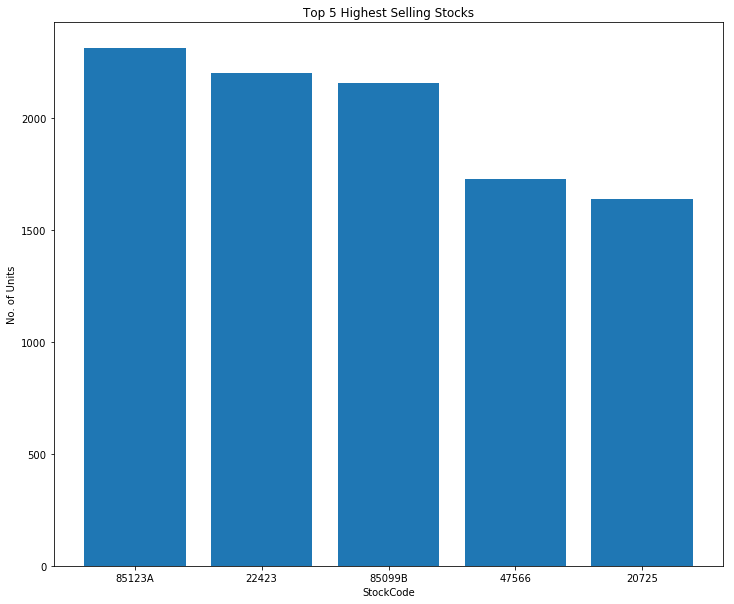

In [21]:
serial = [1,2,3,4,5]

plt.figure(figsize=(12,10))
           
LABELS=["85123A", "22423", "85099B","47566","20725"]

plt.bar(serial, df2['counts'][:5], align='center')
plt.xticks(serial, LABELS)
plt.ylabel('No. of Units')
plt.xlabel('StockCode')
plt.title("Top 5 Highest Selling Stocks")
plt.show()

## Time-Series Forecasting, Price Variation for stock 85123A

In [22]:
foo = df.ix[(df['StockCode']=="85123A")]

C:\Users\Debadri\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [23]:
foo

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
InvoiceDate,,,,,,,,
2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
2010-12-01 09:02:00,536373,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 09:02:00,2.55,17850.0,United Kingdom
2010-12-01 09:32:00,536375,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 09:32:00,2.55,17850.0,United Kingdom
2010-12-01 10:19:00,536390,85123A,WHITE HANGING HEART T-LIGHT HOLDER,64,2010-12-01 10:19:00,2.55,17511.0,United Kingdom
2010-12-01 10:39:00,536394,85123A,WHITE HANGING HEART T-LIGHT HOLDER,32,2010-12-01 10:39:00,2.55,13408.0,United Kingdom
2010-12-01 10:51:00,536396,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 10:51:00,2.55,17850.0,United Kingdom
2010-12-01 11:21:00,536401,85123A,WHITE HANGING HEART T-LIGHT HOLDER,4,2010-12-01 11:21:00,2.95,15862.0,United Kingdom
2010-12-01 11:33:00,536406,85123A,WHITE HANGING HEART T-LIGHT HOLDER,8,2010-12-01 11:33:00,2.55,17850.0,United Kingdom
2010-12-01 12:36:00,536502,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 12:36:00,2.95,16552.0,United Kingdom


C:\Users\Debadri\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=1,center=False).mean()
  """


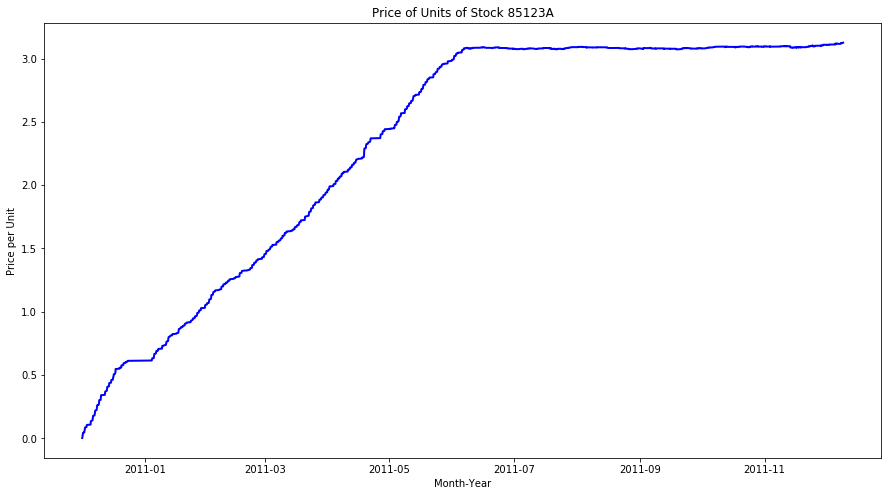

In [24]:
plt.figure(figsize=(15,8))
n = 1200  # the larger n is, the smoother curve will be
b = [1.0 / n] * n
a = 1
yy = lfilter(b,a,pd.rolling_mean(foo['UnitPrice'],1))
plt.plot(foo['InvoiceDate'], yy, linewidth=2, linestyle="-", c="b") 
plt.xlabel('Month-Year')
plt.ylabel('Price per Unit')
plt.title('Price of Units of Stock 85123A')

In [25]:
from statsmodels.tsa.arima_model import ARIMA

C:\Users\Debadri\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [26]:
ts_stock1=foo[['InvoiceDate','UnitPrice']]

In [27]:
ts_stock1 = ts_stock1.reset_index(drop=True)

In [28]:
ts_stock1.head()

,InvoiceDate,UnitPrice
0,2010-12-01 08:26:00,2.55
1,2010-12-01 09:02:00,2.55
2,2010-12-01 09:32:00,2.55
3,2010-12-01 10:19:00,2.55
4,2010-12-01 10:39:00,2.55


In [29]:
ts_stock1.dtypes

InvoiceDate    datetime64[ns]
UnitPrice             float64
dtype: object

In [30]:
ts_stock1.isnull().any()

InvoiceDate    False
UnitPrice      False
dtype: bool

In [31]:
data = pd.Series(ts_stock1.UnitPrice.values, index=ts_stock1.InvoiceDate)

In [32]:
data

InvoiceDate
2010-12-01 08:26:00    2.55
2010-12-01 09:02:00    2.55
2010-12-01 09:32:00    2.55
2010-12-01 10:19:00    2.55
2010-12-01 10:39:00    2.55
2010-12-01 10:51:00    2.55
2010-12-01 11:21:00    2.95
2010-12-01 11:33:00    2.55
2010-12-01 12:36:00    2.95
2010-12-01 12:43:00    2.95
2010-12-01 14:11:00    2.95
2010-12-01 14:32:00    5.91
2010-12-01 16:01:00    2.55
2010-12-01 16:11:00    2.55
2010-12-01 16:52:00    2.95
2010-12-01 17:06:00    5.91
2010-12-01 17:22:00    2.95
2010-12-02 08:32:00    2.55
2010-12-02 08:34:00    2.55
2010-12-02 09:29:00    2.95
2010-12-02 09:41:00    2.55
2010-12-02 09:44:00    2.55
2010-12-02 10:54:00    2.55
2010-12-02 10:56:00    2.55
2010-12-02 12:23:00    2.55
2010-12-02 12:25:00    2.55
2010-12-02 13:49:00    2.95
2010-12-02 14:04:00    2.55
2010-12-02 14:06:00    2.55
2010-12-02 14:42:00    2.95
                       ... 
2011-12-06 11:41:00    2.95
2011-12-06 13:13:00    2.95
2011-12-06 14:14:00    2.95
2011-12-07 08:45:00    2.95
2011-12-

In [33]:
X=data.values

In [34]:
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))



predicted=2.803412, expected=2.950000
predicted=2.894294, expected=2.950000
predicted=2.895305, expected=2.950000
predicted=2.901800, expected=2.550000
predicted=2.794098, expected=2.950000
predicted=2.867867, expected=2.950000
predicted=2.894298, expected=2.550000
predicted=2.803024, expected=2.950000
predicted=2.818780, expected=2.950000
predicted=2.829818, expected=2.550000
predicted=2.803075, expected=2.950000
predicted=2.818826, expected=2.950000
predicted=2.829717, expected=2.950000
predicted=2.895347, expected=2.550000
predicted=2.809520, expected=2.950000
predicted=2.803467, expected=2.550000
predicted=2.801976, expected=2.550000
predicted=2.720125, expected=5.790000
predicted=3.415229, expected=2.550000
predicted=3.271704, expected=2.950000
predicted=3.170178, expected=2.950000
predicted=3.173042, expected=2.550000
predicted=3.092870, expected=2.950000
predicted=3.280639, expected=2.950000
predicted=2.828781, expected=2.950000
predicted=2.895974, expected=2.950000
predicted=2.

predicted=3.033580, expected=2.950000
predicted=3.022268, expected=2.950000
predicted=3.020712, expected=2.950000
predicted=3.023366, expected=2.950000
predicted=2.990615, expected=2.950000
predicted=2.950742, expected=5.790000
predicted=3.607333, expected=5.790000
predicted=4.168698, expected=2.950000
predicted=3.882732, expected=5.790000
predicted=4.427672, expected=2.550000
predicted=4.203954, expected=2.950000
predicted=4.100751, expected=2.950000
predicted=3.761995, expected=2.950000
predicted=3.261476, expected=2.950000
predicted=3.351977, expected=5.790000
predicted=3.545819, expected=2.950000
predicted=3.510338, expected=2.550000
predicted=3.253658, expected=2.950000
predicted=3.278582, expected=2.950000
predicted=3.257244, expected=2.950000
predicted=3.365369, expected=2.950000
predicted=2.899948, expected=2.950000
predicted=2.884686, expected=2.950000
predicted=2.950734, expected=2.950000
predicted=2.950734, expected=2.950000
predicted=2.950733, expected=2.950000
predicted=2.

predicted=2.950680, expected=2.950000
predicted=2.950680, expected=2.950000
predicted=2.950679, expected=2.950000
predicted=2.950679, expected=2.950000
predicted=2.950679, expected=2.950000
predicted=2.950678, expected=2.950000
predicted=2.950678, expected=2.550000
predicted=2.862370, expected=2.950000
predicted=2.877324, expected=2.950000
predicted=2.895500, expected=2.950000
predicted=2.892359, expected=2.950000
predicted=2.893920, expected=2.950000
predicted=2.881886, expected=2.950000
predicted=2.950675, expected=2.550000
predicted=2.862372, expected=2.950000
predicted=2.877323, expected=2.950000
predicted=2.895496, expected=2.950000
predicted=2.892356, expected=2.950000
predicted=2.893916, expected=5.790000
predicted=3.509124, expected=2.550000
predicted=3.385334, expected=5.790000
predicted=3.882730, expected=2.550000
predicted=3.766363, expected=2.550000
predicted=3.523751, expected=2.950000
predicted=3.669885, expected=2.950000
predicted=3.173519, expected=2.950000
predicted=3.

predicted=3.854677, expected=2.950000
predicted=3.444065, expected=2.550000
predicted=2.860893, expected=2.950000
predicted=2.873935, expected=2.950000
predicted=2.896637, expected=2.950000
predicted=2.896298, expected=2.950000
predicted=2.893546, expected=2.950000
predicted=2.881703, expected=2.950000
predicted=2.950606, expected=5.790000
predicted=3.587558, expected=2.950000
predicted=3.495729, expected=2.550000
predicted=3.246056, expected=5.790000
predicted=3.890063, expected=5.790000
predicted=4.466820, expected=2.550000
predicted=4.224530, expected=2.950000
predicted=3.621108, expected=2.950000
predicted=3.625515, expected=2.950000
predicted=3.780504, expected=2.950000
predicted=3.381531, expected=2.950000
predicted=2.882403, expected=2.950000
predicted=2.950602, expected=2.950000
predicted=2.950601, expected=2.550000
predicted=2.860275, expected=2.950000
predicted=2.876389, expected=2.950000
predicted=2.894549, expected=2.950000
predicted=2.894281, expected=2.950000
predicted=2.

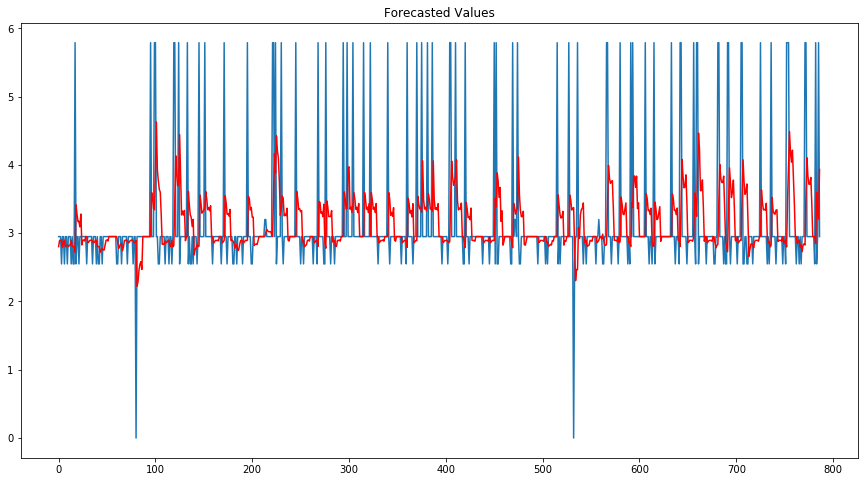

In [35]:
# plot
plt.figure(figsize=(15,8))
plt.plot(test)
plt.plot(predictions, color='red')
plt.title('Forecasted Values')
plt.show()

## Time-Series Forecasting, Price Variation for stock 22423

In [36]:
foo = df.ix[(df['StockCode']=="22423")]

C:\Users\Debadri\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=1,center=False).mean()
  """


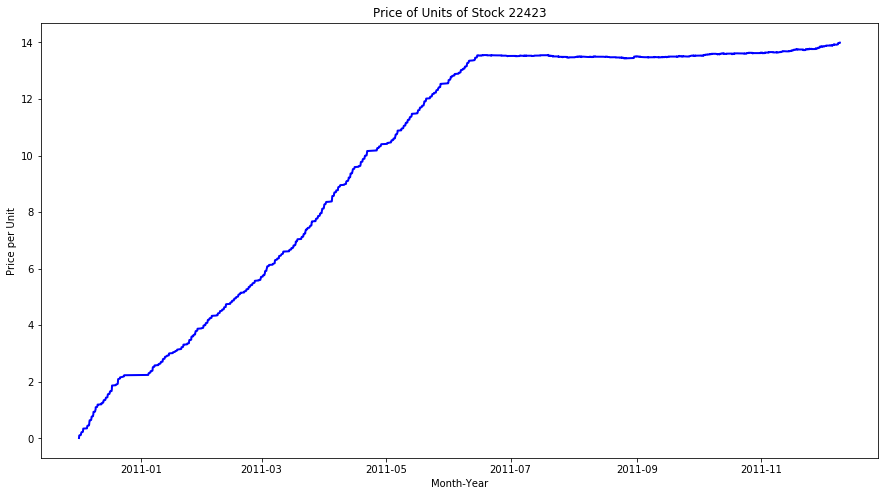

In [37]:
plt.figure(figsize=(15,8))
n = 1200  # the larger n is, the smoother curve will be
b = [1.0 / n] * n
a = 1
yy = lfilter(b,a,pd.rolling_mean(foo['UnitPrice'],1))
plt.plot(foo['InvoiceDate'], yy, linewidth=2, linestyle="-", c="b") 
plt.xlabel('Month-Year')
plt.ylabel('Price per Unit')
plt.title('Price of Units of Stock 22423')

In [38]:
ts_stock1=foo[['InvoiceDate','UnitPrice']]

In [39]:
ts_stock1 = ts_stock1.reset_index(drop=True)

In [40]:
data = pd.Series(ts_stock1.UnitPrice.values, index=ts_stock1.InvoiceDate)

In [41]:
X=data.values

In [42]:
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))


predicted=14.647296, expected=12.750000
predicted=13.358385, expected=12.750000
predicted=13.815936, expected=12.750000
predicted=14.237069, expected=10.950000
predicted=15.371542, expected=12.750000
predicted=12.373903, expected=12.750000
predicted=12.594817, expected=12.750000
predicted=12.594062, expected=10.950000
predicted=12.087912, expected=12.750000
predicted=11.924057, expected=10.950000
predicted=12.148551, expected=10.950000
predicted=11.770191, expected=12.750000
predicted=12.000685, expected=12.750000
predicted=11.987385, expected=10.950000
predicted=11.930913, expected=24.960000
predicted=14.726636, expected=10.950000
predicted=14.271831, expected=12.750000
predicted=13.292313, expected=12.750000
predicted=13.439146, expected=12.750000
predicted=13.612303, expected=12.750000
predicted=15.606434, expected=24.960000
predicted=15.285274, expected=12.750000
predicted=15.314001, expected=12.750000
predicted=13.827913, expected=12.750000
predicted=13.806414, expected=12.750000


predicted=13.766378, expected=12.750000
predicted=13.616152, expected=24.960000
predicted=16.752334, expected=12.750000
predicted=18.271295, expected=12.750000
predicted=13.928932, expected=12.750000
predicted=13.918889, expected=12.750000
predicted=14.229544, expected=10.950000
predicted=15.201601, expected=12.750000
predicted=12.367435, expected=12.750000
predicted=12.577450, expected=12.750000
predicted=12.578851, expected=10.950000
predicted=12.100475, expected=12.750000
predicted=11.943996, expected=12.750000
predicted=12.577445, expected=12.750000
predicted=12.578600, expected=24.960000
predicted=15.484083, expected=12.750000
predicted=14.934139, expected=12.750000
predicted=13.935839, expected=12.750000
predicted=13.916209, expected=12.750000
predicted=14.225561, expected=12.750000
predicted=15.634427, expected=12.750000
predicted=12.751075, expected=24.960000
predicted=15.695461, expected=12.750000
predicted=15.356686, expected=12.750000
predicted=13.940784, expected=24.960000


predicted=11.713177, expected=12.750000
predicted=11.966495, expected=12.750000
predicted=12.563742, expected=12.750000
predicted=12.554432, expected=24.960000
predicted=15.270882, expected=12.750000
predicted=14.942823, expected=12.750000
predicted=14.026642, expected=10.950000
predicted=13.677046, expected=12.750000
predicted=13.938480, expected=12.750000
predicted=15.304673, expected=12.750000
predicted=12.554930, expected=12.750000
predicted=12.520035, expected=12.750000
predicted=12.348595, expected=12.750000
predicted=12.750962, expected=24.960000
predicted=15.499009, expected=24.960000
predicted=18.119233, expected=12.750000
predicted=16.583341, expected=12.750000
predicted=15.345531, expected=12.750000
predicted=15.659199, expected=24.960000
predicted=19.849066, expected=12.750000
predicted=18.013153, expected=12.750000
predicted=14.004822, expected=12.750000
predicted=14.142649, expected=10.950000
predicted=13.946485, expected=12.750000
predicted=15.065749, expected=12.750000


predicted=14.241122, expected=12.750000
predicted=14.340817, expected=24.960000
predicted=18.103131, expected=24.960000
predicted=17.947889, expected=12.750000
predicted=16.496644, expected=12.750000
predicted=15.530502, expected=12.750000
predicted=15.856446, expected=12.750000
predicted=17.042247, expected=24.960000
predicted=18.175775, expected=12.750000
predicted=15.182256, expected=12.750000
predicted=14.047094, expected=10.950000
predicted=13.808186, expected=10.950000
predicted=13.653523, expected=12.750000
predicted=14.879920, expected=12.750000
predicted=12.347123, expected=24.960000
predicted=15.027073, expected=24.960000
predicted=17.311554, expected=12.750000
predicted=16.052374, expected=12.750000
predicted=15.469563, expected=12.750000
predicted=15.856565, expected=10.950000
predicted=16.689217, expected=10.950000
predicted=14.660442, expected=12.750000
predicted=12.205235, expected=12.750000
predicted=12.350847, expected=12.750000
predicted=12.297857, expected=10.950000


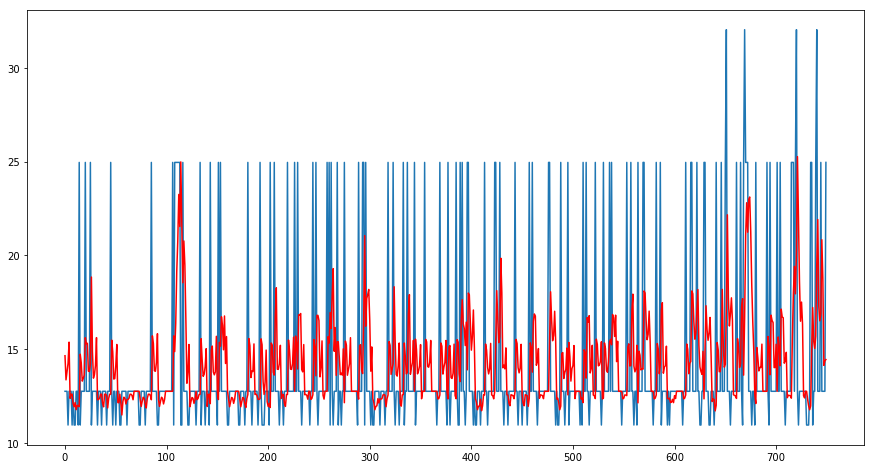

In [43]:
# plot
plt.figure(figsize=(15,8))
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

## Time-Series Forecasting, Price Variation for stock 85099B

In [44]:
foo = df.ix[(df['StockCode']=="85099B")]

C:\Users\Debadri\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=1,center=False).mean()
  """


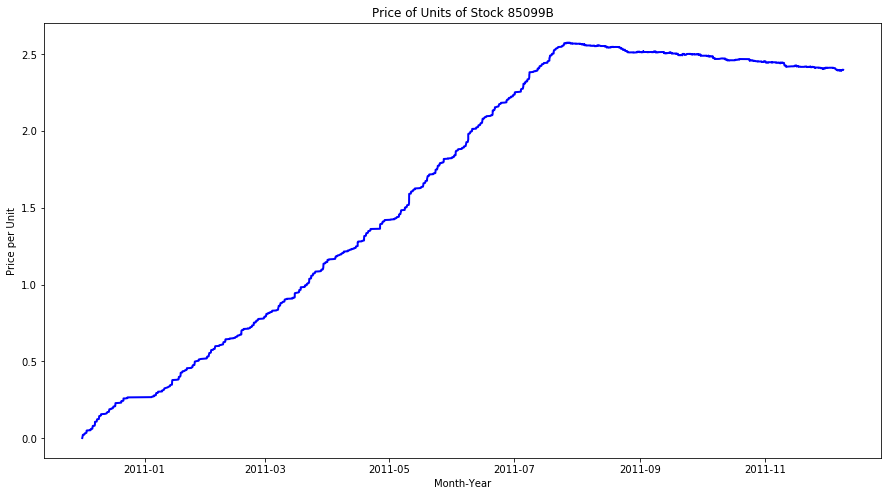

In [45]:
plt.figure(figsize=(15,8))
n = 1200  # the larger n is, the smoother curve will be
b = [1.0 / n] * n
a = 1
yy = lfilter(b,a,pd.rolling_mean(foo['UnitPrice'],1))
plt.plot(foo['InvoiceDate'], yy, linewidth=2, linestyle="-", c="b") 
plt.xlabel('Month-Year')
plt.ylabel('Price per Unit')
plt.title('Price of Units of Stock 85099B')

In [46]:
ts_stock1=foo[['InvoiceDate','UnitPrice']]

In [47]:
ts_stock1 = ts_stock1.reset_index(drop=True)

In [48]:
data = pd.Series(ts_stock1.UnitPrice.values, index=ts_stock1.InvoiceDate)

In [49]:
X=data.values

In [50]:
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))



predicted=2.080538, expected=2.080000
predicted=2.080537, expected=1.790000
predicted=1.933151, expected=1.790000
predicted=1.887059, expected=2.080000
predicted=2.010893, expected=4.130000
predicted=3.089520, expected=4.130000
predicted=3.414448, expected=4.130000
predicted=3.553276, expected=2.080000
predicted=2.599282, expected=2.080000
predicted=2.494601, expected=2.080000
predicted=2.604670, expected=4.130000
predicted=3.582312, expected=2.080000
predicted=2.676878, expected=2.080000
predicted=2.238617, expected=2.080000
predicted=2.159428, expected=2.080000
predicted=2.261961, expected=2.080000
predicted=2.350034, expected=4.130000
predicted=3.123119, expected=2.080000
predicted=2.405346, expected=2.080000
predicted=2.238674, expected=2.080000
predicted=2.159069, expected=2.080000
predicted=2.258584, expected=2.080000
predicted=2.356920, expected=2.080000
predicted=2.080531, expected=2.080000
predicted=2.080530, expected=2.080000
predicted=2.080530, expected=2.080000
predicted=2.

predicted=2.080474, expected=2.080000
predicted=2.080474, expected=2.080000
predicted=2.080474, expected=4.130000
predicted=3.081410, expected=2.080000
predicted=2.424774, expected=4.130000
predicted=3.239266, expected=2.080000
predicted=2.523127, expected=2.080000
predicted=2.426341, expected=2.080000
predicted=2.443508, expected=2.080000
predicted=2.265418, expected=2.080000
predicted=2.354659, expected=2.080000
predicted=2.080472, expected=2.080000
predicted=2.080472, expected=4.130000
predicted=3.074456, expected=4.130000
predicted=3.429246, expected=2.080000
predicted=2.591440, expected=2.080000
predicted=2.330406, expected=4.130000
predicted=3.351071, expected=2.080000
predicted=2.883035, expected=2.080000
predicted=2.524983, expected=2.080000
predicted=2.173719, expected=2.080000
predicted=2.259519, expected=2.080000
predicted=2.354308, expected=2.080000
predicted=2.080469, expected=4.130000
predicted=3.074415, expected=2.080000
predicted=2.427423, expected=1.790000
predicted=2.

predicted=1.943915, expected=2.080000
predicted=2.032226, expected=2.080000
predicted=2.051905, expected=4.130000
predicted=3.032308, expected=4.130000
predicted=3.360930, expected=1.790000
predicted=2.446021, expected=2.080000
predicted=2.328414, expected=1.790000
predicted=2.202379, expected=4.130000
predicted=3.441884, expected=2.080000
predicted=2.620509, expected=2.080000
predicted=2.229105, expected=2.080000
predicted=2.153227, expected=2.080000
predicted=2.241851, expected=2.080000
predicted=2.336153, expected=2.080000
predicted=2.080421, expected=2.080000
predicted=2.080421, expected=2.080000
predicted=2.080420, expected=2.080000
predicted=2.080420, expected=2.080000
predicted=2.080420, expected=4.130000
predicted=3.043782, expected=2.080000
predicted=2.419225, expected=2.080000
predicted=2.279947, expected=2.080000
predicted=2.181818, expected=2.080000
predicted=2.278228, expected=2.080000
predicted=2.336300, expected=1.790000
predicted=1.944387, expected=2.080000
predicted=2.

predicted=2.705990, expected=2.080000
predicted=2.748814, expected=2.080000
predicted=2.449484, expected=2.080000
predicted=2.275024, expected=2.080000
predicted=2.340670, expected=2.080000
predicted=2.080380, expected=2.080000
predicted=2.080380, expected=2.080000
predicted=2.080380, expected=2.080000
predicted=2.080380, expected=2.080000
predicted=2.080380, expected=2.080000
predicted=2.080379, expected=4.130000
predicted=3.038401, expected=2.080000
predicted=2.403308, expected=4.130000
predicted=3.243618, expected=2.080000
predicted=2.519982, expected=4.130000
predicted=3.425005, expected=2.080000
predicted=2.797236, expected=2.080000
predicted=2.473222, expected=2.080000
predicted=2.457209, expected=2.080000
predicted=2.271138, expected=2.080000
predicted=2.341133, expected=2.080000
predicted=2.080378, expected=4.130000
predicted=3.028565, expected=4.130000
predicted=3.367407, expected=2.080000
predicted=2.616983, expected=4.130000
predicted=3.346394, expected=1.790000
predicted=2.

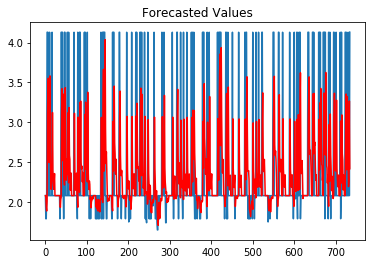

In [51]:
# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.title('Forecasted Values')
plt.show()

## Time-Series Forecasting, Price Variation for stock 47566

In [52]:
foo = df.ix[(df['StockCode']=="47566")]

C:\Users\Debadri\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=1,center=False).mean()
  """


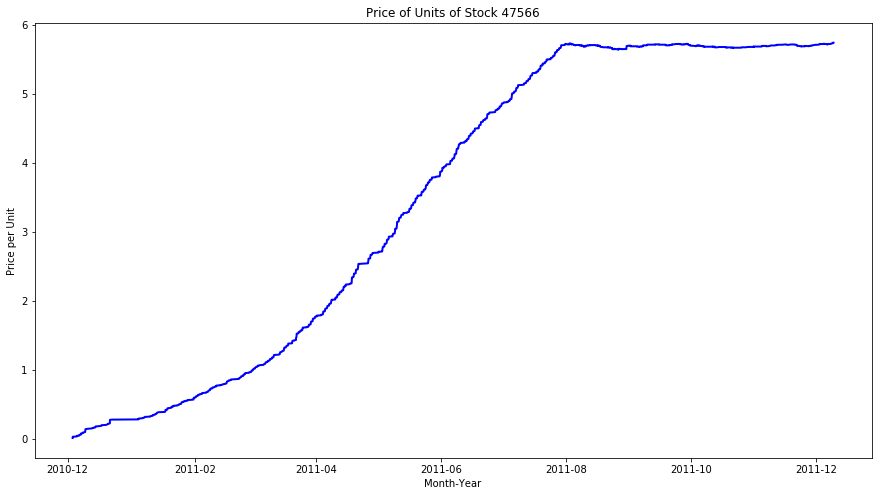

In [53]:
plt.figure(figsize=(15,8))
n = 1200  # the larger n is, the smoother curve will be
b = [1.0 / n] * n
a = 1
yy = lfilter(b,a,pd.rolling_mean(foo['UnitPrice'],1))
plt.plot(foo['InvoiceDate'], yy, linewidth=2, linestyle="-", c="b") 
plt.xlabel('Month-Year')
plt.ylabel('Price per Unit')
plt.title('Price of Units of Stock 47566')

In [54]:
ts_stock1=foo[['InvoiceDate','UnitPrice']]

In [55]:
ts_stock1 = ts_stock1.reset_index(drop=True)

In [56]:
data = pd.Series(ts_stock1.UnitPrice.values, index=ts_stock1.InvoiceDate)

In [57]:
X=data.values

In [58]:
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

predicted=5.204730, expected=4.950000
predicted=5.471594, expected=4.300000
predicted=5.648671, expected=10.790000
predicted=6.730062, expected=10.790000
predicted=7.621040, expected=4.950000
predicted=6.782589, expected=4.150000
predicted=6.102798, expected=4.950000
predicted=5.841719, expected=4.950000
predicted=6.405199, expected=4.950000
predicted=5.829329, expected=4.950000
predicted=4.854755, expected=4.950000
predicted=4.812471, expected=4.950000
predicted=4.942219, expected=4.950000
predicted=4.942226, expected=4.950000
predicted=4.942232, expected=4.950000
predicted=4.942239, expected=4.950000
predicted=4.942246, expected=4.950000
predicted=4.942252, expected=4.950000
predicted=4.942259, expected=10.790000
predicted=6.858242, expected=5.790000
predicted=6.082860, expected=4.950000
predicted=6.082214, expected=4.950000
predicted=5.568687, expected=4.950000
predicted=5.653503, expected=4.950000
predicted=5.986632, expected=4.950000
predicted=5.078504, expected=4.950000
predicted

predicted=10.796143, expected=10.790000
predicted=10.796139, expected=4.950000
predicted=8.778590, expected=10.790000
predicted=9.935127, expected=4.950000
predicted=7.828081, expected=4.950000
predicted=7.450136, expected=4.950000
predicted=6.316051, expected=4.950000
predicted=5.552879, expected=4.950000
predicted=5.844638, expected=4.950000
predicted=4.943539, expected=4.950000
predicted=4.943544, expected=10.790000
predicted=6.962687, expected=4.950000
predicted=5.836041, expected=4.950000
predicted=5.924687, expected=4.950000
predicted=5.409647, expected=10.790000
predicted=7.551546, expected=10.790000
predicted=8.728007, expected=4.950000
predicted=6.784553, expected=4.950000
predicted=6.412614, expected=4.950000
predicted=6.074066, expected=4.950000
predicted=6.456488, expected=4.950000
predicted=5.820479, expected=4.950000
predicted=4.943595, expected=4.950000
predicted=4.943599, expected=4.950000
predicted=4.943604, expected=4.950000
predicted=4.943609, expected=4.950000
predi

predicted=4.944308, expected=4.950000
predicted=4.944312, expected=10.790000
predicted=6.859044, expected=4.300000
predicted=5.631097, expected=4.950000
predicted=5.789959, expected=4.950000
predicted=5.420270, expected=4.950000
predicted=5.479844, expected=4.950000
predicted=5.806325, expected=4.950000
predicted=4.841414, expected=4.950000
predicted=4.944335, expected=10.790000
predicted=6.851030, expected=4.950000
predicted=5.845038, expected=4.950000
predicted=5.889833, expected=4.950000
predicted=5.527521, expected=4.950000
predicted=5.546427, expected=4.950000
predicted=5.872822, expected=10.790000
predicted=6.842430, expected=4.950000
predicted=5.843002, expected=4.950000
predicted=5.884988, expected=4.950000
predicted=5.525204, expected=4.950000
predicted=5.539375, expected=4.950000
predicted=5.897613, expected=4.950000
predicted=4.944372, expected=10.790000
predicted=6.837839, expected=4.950000
predicted=5.844141, expected=4.950000
predicted=5.884989, expected=4.950000
predicte

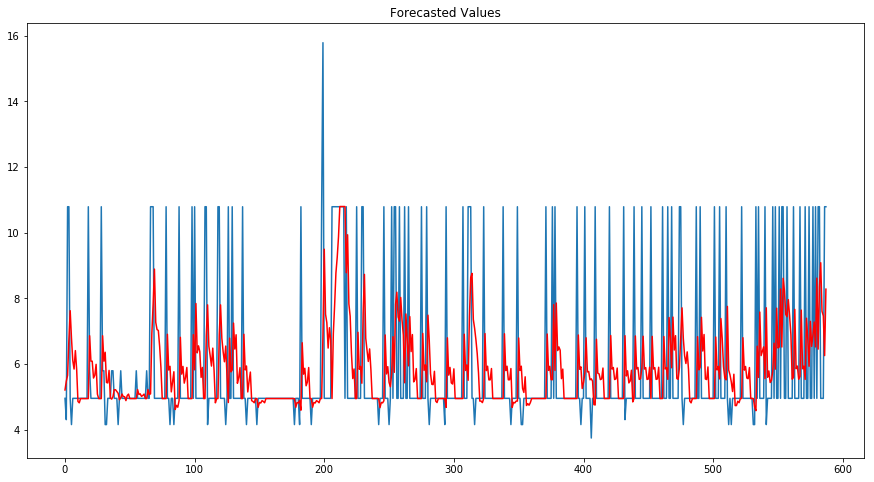

In [59]:
plt.figure(figsize=(15,8))
plt.plot(test)
plt.plot(predictions, color='red')
plt.title('Forecasted Values')
plt.show()

## Time-Series Forecasting, Price Variation for stock 20725

In [60]:
foo = df.ix[(df['StockCode']=="20725")]

In [61]:
foo

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
InvoiceDate,,,,,,,,
2010-12-01 09:37:00,536378,20725,LUNCH BAG RED RETROSPOT,10,2010-12-01 09:37:00,1.65,14688.0,United Kingdom
2010-12-01 11:21:00,536401,20725,LUNCH BAG RED RETROSPOT,1,2010-12-01 11:21:00,1.65,15862.0,United Kingdom
2010-12-01 11:49:00,536412,20725,LUNCH BAG RED RETROSPOT,1,2010-12-01 11:49:00,1.65,17920.0,United Kingdom
2010-12-01 14:32:00,536544,20725,LUNCH BAG RED RETROSPOT,4,2010-12-01 14:32:00,4.21,-1.0,United Kingdom
2010-12-01 16:13:00,536577,20725,LUNCH BAG RED RETROSPOT,60,2010-12-01 16:13:00,1.45,13777.0,United Kingdom
2010-12-01 17:06:00,536592,20725,LUNCH BAG RED RETROSPOT,2,2010-12-01 17:06:00,4.21,-1.0,United Kingdom
2010-12-02 14:47:00,536769,20725,LUNCH BAG RED RETROSPOT,10,2010-12-02 14:47:00,1.65,17581.0,United Kingdom
2010-12-02 19:18:00,536845,20725,LUNCH BAG RED RETROSPOT,1,2010-12-02 19:18:00,1.65,17961.0,United Kingdom
2010-12-03 11:13:00,536862,20725,LUNCH BAG RED RETROSPOT,3,2010-12-03 11:13:00,5.06,-1.0,United Kingdom


C:\Users\Debadri\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=1,center=False).mean()
  """


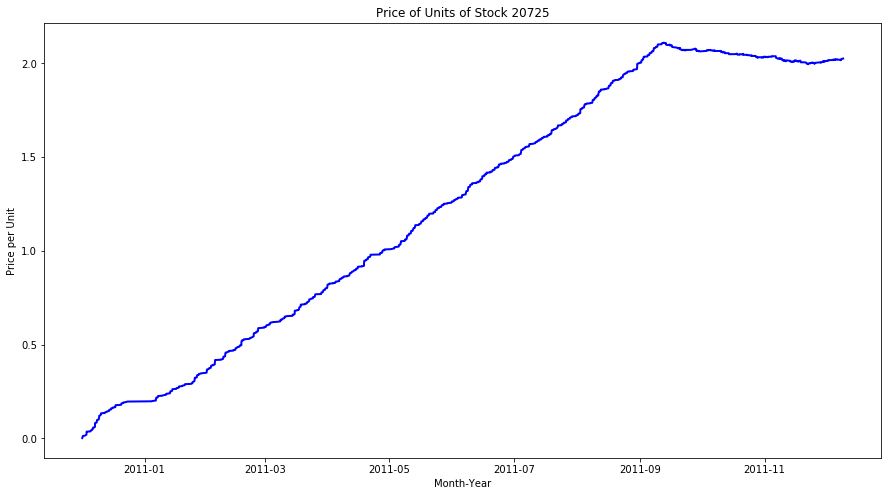

In [62]:
plt.figure(figsize=(15,8))
n = 1200  # the larger n is, the smoother curve will be
b = [1.0 / n] * n
a = 1
yy = lfilter(b,a,pd.rolling_mean(foo['UnitPrice'],1))
plt.plot(foo['InvoiceDate'], yy, linewidth=2, linestyle="-", c="b") 
plt.xlabel('Month-Year')
plt.ylabel('Price per Unit')
plt.title('Price of Units of Stock 20725')

In [63]:
ts_stock1=foo[['InvoiceDate','UnitPrice']]

In [64]:
ts_stock1 = ts_stock1.reset_index(drop=True)

In [65]:
data = pd.Series(ts_stock1.UnitPrice.values, index=ts_stock1.InvoiceDate)

In [66]:
X=data.values

In [67]:
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))



predicted=1.648819, expected=1.650000
predicted=1.648820, expected=1.650000
predicted=1.648821, expected=1.650000
predicted=1.648822, expected=1.650000
predicted=1.648823, expected=1.650000
predicted=1.648824, expected=1.650000
predicted=1.648825, expected=1.650000
predicted=1.648826, expected=1.650000
predicted=1.648827, expected=1.650000
predicted=1.648828, expected=1.650000
predicted=1.648829, expected=1.650000
predicted=1.648831, expected=1.650000
predicted=1.648832, expected=1.650000
predicted=1.648833, expected=1.650000
predicted=1.648834, expected=1.650000
predicted=1.648835, expected=1.650000
predicted=1.648836, expected=1.650000
predicted=1.648837, expected=1.650000
predicted=1.648838, expected=1.650000
predicted=1.648839, expected=1.650000
predicted=1.648840, expected=1.650000
predicted=1.648841, expected=1.650000
predicted=1.648842, expected=1.650000
predicted=1.648843, expected=1.650000
predicted=1.648844, expected=1.650000
predicted=1.648845, expected=4.960000
predicted=2.

predicted=1.628392, expected=1.650000
predicted=1.622372, expected=1.650000
predicted=1.619232, expected=1.650000
predicted=1.648991, expected=1.650000
predicted=1.648991, expected=1.650000
predicted=1.648992, expected=1.650000
predicted=1.648993, expected=1.650000
predicted=1.648994, expected=1.650000
predicted=1.648995, expected=4.130000
predicted=2.512765, expected=4.130000
predicted=2.856911, expected=1.650000
predicted=2.312225, expected=1.650000
predicted=2.232384, expected=1.650000
predicted=2.236302, expected=4.130000
predicted=3.220401, expected=4.130000
predicted=3.216534, expected=1.650000
predicted=2.299309, expected=4.960000
predicted=3.386783, expected=1.650000
predicted=2.700524, expected=1.650000
predicted=2.801807, expected=1.650000
predicted=2.354522, expected=1.650000
predicted=2.106030, expected=4.130000
predicted=2.989786, expected=1.650000
predicted=1.989545, expected=1.650000
predicted=1.977843, expected=1.650000
predicted=1.898752, expected=1.650000
predicted=2.

predicted=2.362483, expected=1.650000
predicted=1.985597, expected=1.650000
predicted=1.649117, expected=1.650000
predicted=1.649118, expected=1.650000
predicted=1.649118, expected=1.650000
predicted=1.649119, expected=1.650000
predicted=1.649119, expected=1.650000
predicted=1.649120, expected=1.650000
predicted=1.649121, expected=1.650000
predicted=1.649121, expected=1.650000
predicted=1.649122, expected=1.650000
predicted=1.649122, expected=4.130000
predicted=2.426335, expected=1.650000
predicted=2.001414, expected=1.650000
predicted=1.992341, expected=4.960000
predicted=2.983645, expected=1.650000
predicted=2.492555, expected=1.650000
predicted=2.463410, expected=1.650000
predicted=2.051015, expected=1.650000
predicted=2.149558, expected=1.650000
predicted=2.098525, expected=4.130000
predicted=2.419318, expected=1.650000
predicted=1.997903, expected=1.650000
predicted=2.003005, expected=1.650000
predicted=1.948627, expected=1.650000
predicted=2.019842, expected=1.650000
predicted=1.

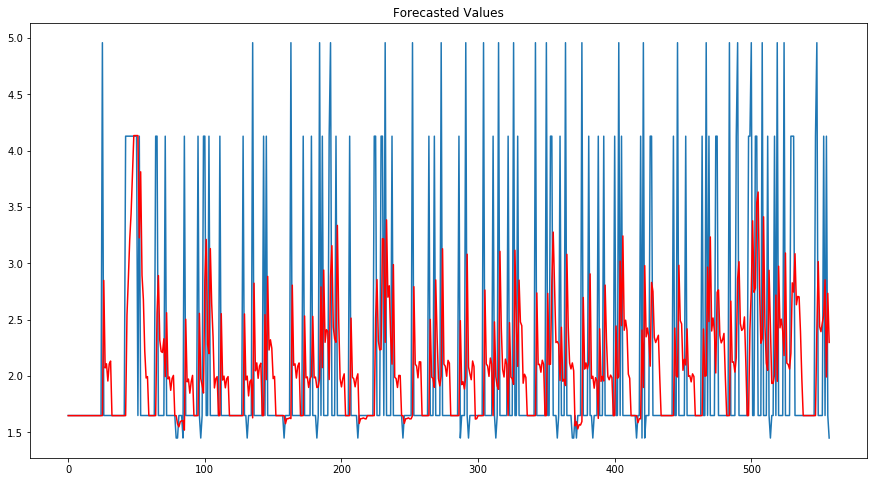

In [68]:
plt.figure(figsize=(15,8))
# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.title('Forecasted Values')
plt.show()

## Correlation between unit price and quantity sold.

In [ ]:
print("Correlation b/w Unit Price and Quantity Sold",df['Quantity'].corr(df['UnitPrice']))

Correlation b/w Unit Price and Quantity Sold -0.00123492454487


They are not highly correlated but it is evident that if one increases then the other will decrease, since correlation value is negative

## Checking if description has any effect on the price or sale of goods.

In [ ]:
print("Correlation b/w Description and Quantity Sold",df['Quantity'].corr(df['Description']))

In [ ]:
df['Description'][0]

In [ ]:
df['Description'][0]="Not Available"
df['Description'][1]="Not Available"
df['Description'][2]="Not Available"

In [ ]:
print("Correlation b/w Description and Quantity Sold",df['Quantity'].corr(df['Description']))

Due to slow laptop and lack of submission time, I wasn't able to execute the last part,

## Tools Used: Pandas, Numpy
## For Visualization: Matplotlib
## For Forecasting: ARIMA Model